# FIZA GAFOOR M 

## CAR PRICE PREDICTION WITH MACHINE LEARNING

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

## Reading the dataset

In [2]:
#load dataset
df_main = pd.read_csv(r"D:\DUK\INTERNSHIPS\OASIS-Infobyte\task3\car data.csv")

## Basic Information about the data

In [3]:
df_main.head() # Displays the first 5 entries

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df_main.tail() # Displays the last 5 entries

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [5]:
df_main.shape  #Displays the number of rows and columns in the dataset

(301, 9)

In [6]:
df_main.columns #List out all columns in the dataset

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [7]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
#numerical stats
df_main.describe()  # Basic statistical information about the data

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
#missing values
df_main.isna().sum() # Get the number of null or missing values in the data

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [10]:
df_main.duplicated().sum()   # Get the total number of duplicated entries in the data

2

In [11]:
df_main = df_main.drop_duplicates()  # Removes the duplicates

##### Duplcate rows are all deleted.

## Data Preprocessing

In [12]:
df_main['Age'] = 2020 - df_main['Year']
df_main.drop('Year',axis=1,inplace = True)

In [13]:
df_main.rename(columns = {'Selling_Price':'Selling_Price(lacs)','Present_Price':'Present_Price(lacs)','Owner':'Past_Owners'},inplace = True)

In [14]:
df_main.head()

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Driven_kms,Fuel_Type,Selling_type,Transmission,Past_Owners,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


### Handling Outliers

Selling_Price(lacs)


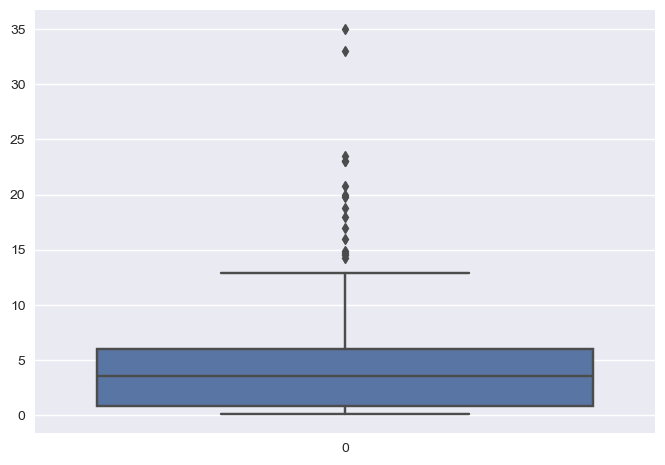

Present_Price(lacs)


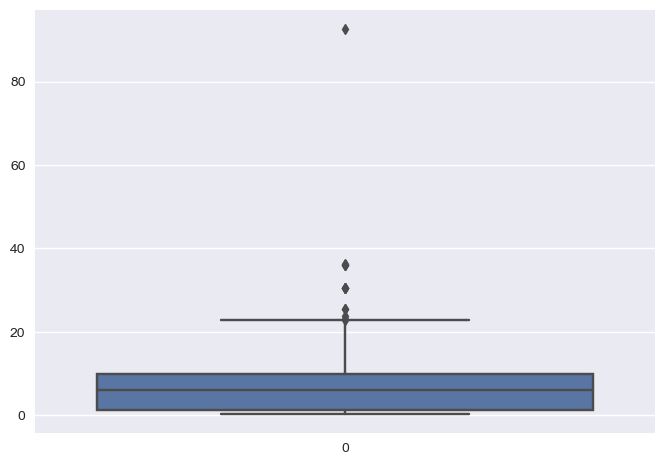

Driven_kms


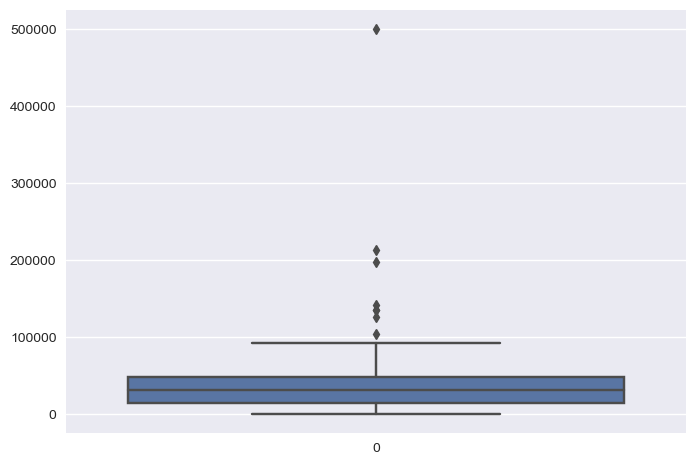

Age


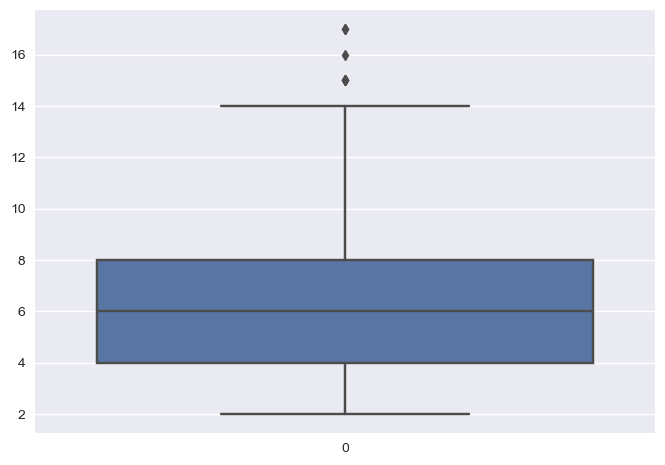

In [15]:
num_cols = df_main[['Selling_Price(lacs)','Present_Price(lacs)','Driven_kms','Age']]

for i in num_cols:
    print(i)
    sns.boxplot(data=df_main[i])
    plt.show()

In [16]:
num_cols = df_main[['Selling_Price(lacs)','Present_Price(lacs)','Driven_kms','Age']]

for i in num_cols:
    Q1 = df_main[i].quantile(0.25)
    Q3 = df_main[i].quantile(0.75)

    IQR = Q3-Q1
    low = Q1-1.5*IQR
    up = Q3+1.5*IQR

    for j in df_main[i]:
        if j<=low:
            df_main=df_main.replace(j, low)
        if j>=up:
            df_main=df_main.replace(j, up)

## Exploratory Data Analysis (EDA)

#### Univariate Analysis

In [17]:
df_main.columns

Index(['Car_Name', 'Selling_Price(lacs)', 'Present_Price(lacs)', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Past_Owners', 'Age'],
      dtype='object')

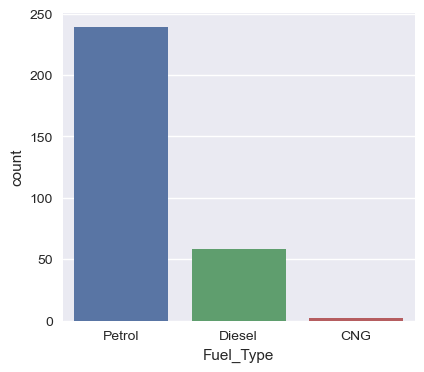

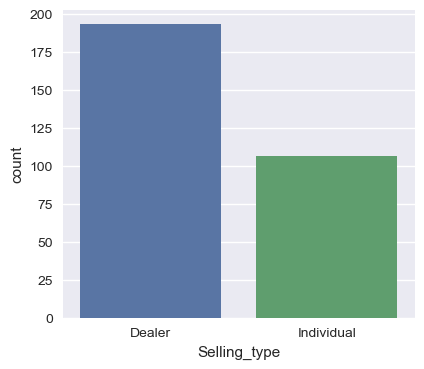

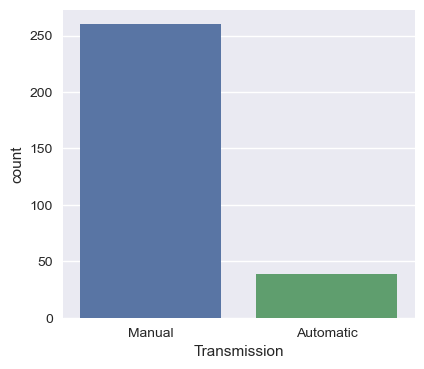

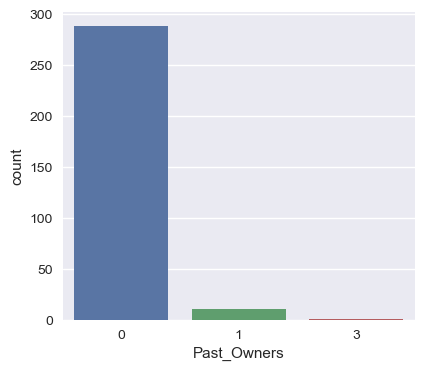

In [18]:
cat_cols = df_main[['Fuel_Type','Selling_type','Transmission','Past_Owners']]

for i in cat_cols:
    fig = plt.figure(figsize=[10,4])

    plt.subplot(1,2,1)
    sns.countplot(x=i, data=df_main)
    
    
    plt.show()

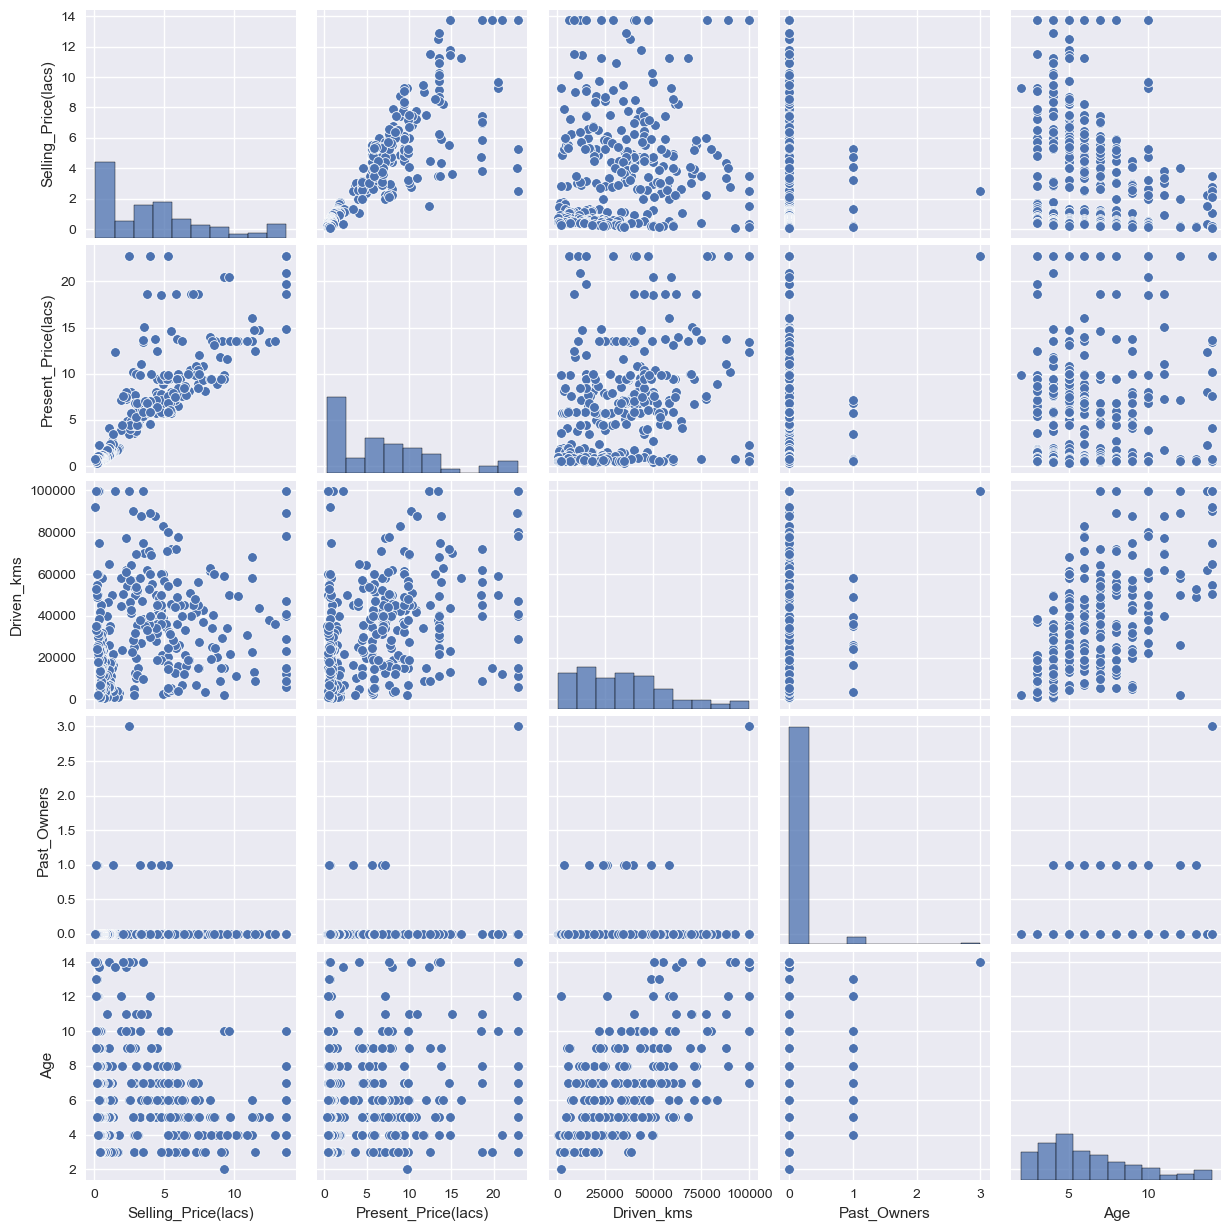

In [19]:
sns.pairplot(data=df_main)
plt.show()

#### Bivariate/Multi-Variate Analysis

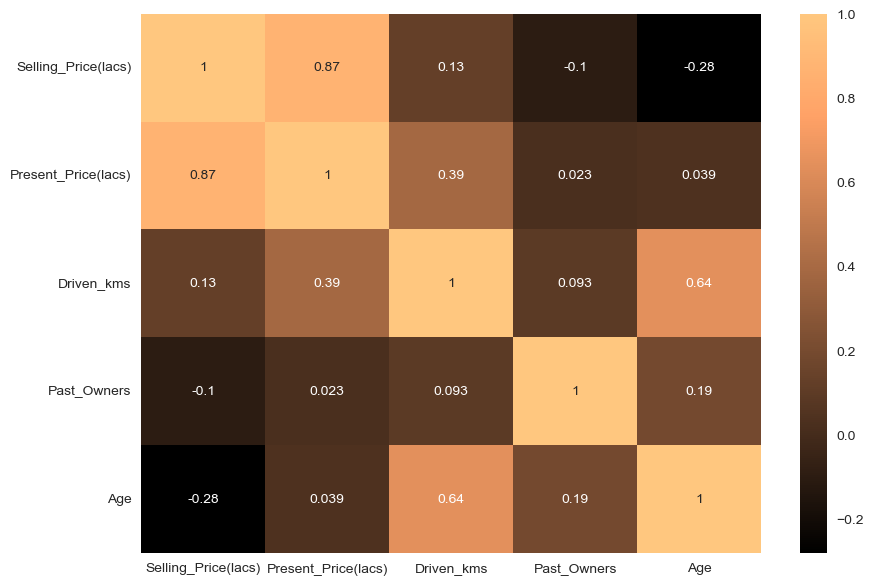

In [20]:
plt.figure(figsize=(10,7))
sns.heatmap(data=df_main.corr(), annot=True, cmap='copper')
plt.show()

In [21]:
df_main.corr()['Selling_Price(lacs)']

Selling_Price(lacs)    1.000000
Present_Price(lacs)    0.868737
Driven_kms             0.126259
Past_Owners           -0.100757
Age                   -0.281217
Name: Selling_Price(lacs), dtype: float64

In [22]:
df_main.pivot_table(values='Selling_Price(lacs)', index = 'Selling_type', columns= 'Fuel_Type')

Fuel_Type,CNG,Diesel,Petrol
Selling_type,,,
Dealer,3.1,8.342807,5.179067
Individual,NaN,13.725000,0.726857


In [23]:
df_main.pivot_table(values='Selling_Price(lacs)', index = 'Selling_type', columns= 'Transmission')

Transmission,Automatic,Manual
Selling_type,,
Dealer,9.070893,5.586364
Individual,1.761364,0.743895


## Data Preparation

### Encoding the Categorical Variables

In [24]:
df_main.drop(labels='Car_Name',axis= 1, inplace = True) # Dropping irrelevant columns 

In [25]:
df_main.head()

,Selling_Price(lacs),Present_Price(lacs),Driven_kms,Fuel_Type,Selling_type,Transmission,Past_Owners,Age
0,3.35,5.59,27000.0,Petrol,Dealer,Manual,0,6.0
1,4.75,9.54,43000.0,Diesel,Dealer,Manual,0,7.0
2,7.25,9.85,6900.0,Petrol,Dealer,Manual,0,3.0
3,2.85,4.15,5200.0,Petrol,Dealer,Manual,0,9.0
4,4.60,6.87,42450.0,Diesel,Dealer,Manual,0,6.0


In [26]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for i in cat_cols:
    cat_cols[i] = encoder.fit_transform(df_main[i])

In [27]:
cat_cols.head()

,Fuel_Type,Selling_type,Transmission,Past_Owners
0,2,0,1,0
1,1,0,1,0
2,2,0,1,0
3,2,0,1,0
4,1,0,1,0


### Scaling Numerical Columns

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(num_cols)

cols = num_cols.columns
scaled_dataset = pd.DataFrame(scaled_data, columns=cols)

In [29]:
scaled_dataset.head()

,Selling_Price(lacs),Present_Price(lacs),Driven_kms,Age
0,0.093123,0.057109,0.053053,0.266667
1,0.133238,0.099913,0.085085,0.333333
2,0.204871,0.103273,0.012813,0.066667
3,0.078797,0.041504,0.009409,0.466667
4,0.128940,0.070980,0.083984,0.266667


In [30]:
# Concatenate both encoded categorical dataframe and scaled numerical dataframe.

df_main = pd.concat([cat_cols, scaled_dataset], axis=1)

In [31]:
df_main.head()

,Fuel_Type,Selling_type,Transmission,Past_Owners,Selling_Price(lacs),Present_Price(lacs),Driven_kms,Age
0,2.0,0.0,1.0,0.0,0.093123,0.057109,0.053053,0.266667
1,1.0,0.0,1.0,0.0,0.133238,0.099913,0.085085,0.333333
2,2.0,0.0,1.0,0.0,0.204871,0.103273,0.012813,0.066667
3,2.0,0.0,1.0,0.0,0.078797,0.041504,0.009409,0.466667
4,1.0,0.0,1.0,0.0,0.128940,0.070980,0.083984,0.266667


In [32]:
df_main.isna().sum() # rechecking for null values

Fuel_Type              2
Selling_type           2
Transmission           2
Past_Owners            2
Selling_Price(lacs)    2
Present_Price(lacs)    2
Driven_kms             2
Age                    2
dtype: int64

In [33]:
df_main.dropna(inplace=True) # Dropping rows with null values

## Model Building

In [34]:
# Separating target variable and its features
y = df_main['Selling_Price(lacs)']
X = df_main.drop('Selling_Price(lacs)',axis=1)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (237, 7)
x test:  (60, 7)
y train:  (237,)
y test:  (60,)


In [37]:
X_train.fillna(X_train.mean(), inplace=True)
y_train.fillna(y_train.mean(), inplace=True)

### Model Creation/Evaluation

#### Applying regression models
1. Linear Regression 
2. Ridge Regression
3. Lasso Regression
4. Random Forest Regression
5. Gradient Boosting regression

In [38]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [39]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

#### Standard Linear Regression or Ordinary Least Squares

Train R2-score : 0.88
Test R2-score : 0.81
Train CV scores : [0.87081461 0.7155334  0.85183921 0.84427809 0.82325796]
Train CV mean : 0.82


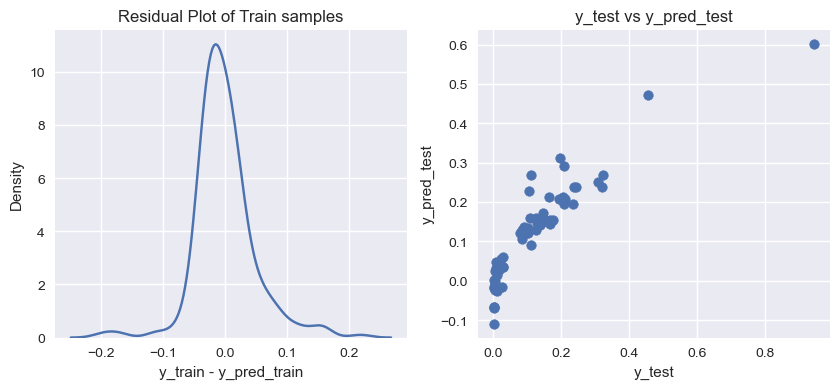

In [40]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

#### Ridge

Train R2-score : 0.87
Test R2-score : 0.79
Train CV scores : [0.8536154  0.76187103 0.83209191 0.85949377 0.80388706]
Train CV mean : 0.82


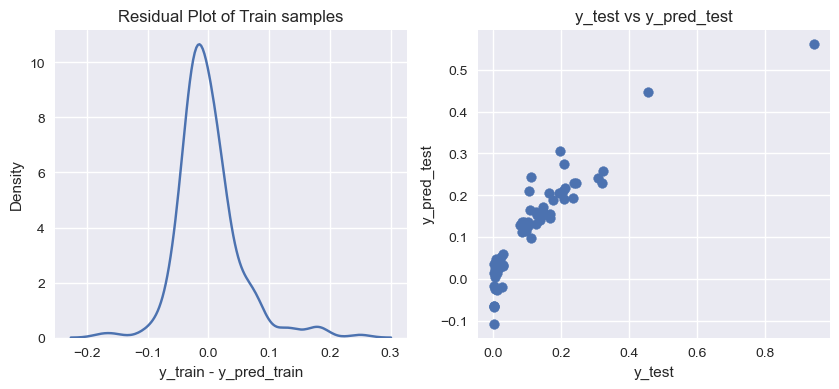

In [41]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

car_pred_model(rg_rs,"ridge.pkl")

#### Lasso

In [42]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))

Train R2-score : 0.87
Test R2-score : 0.79
Train CV scores : [0.84019664 0.76831699 0.8551011  0.85925358 0.80730304]
Train CV mean : 0.83


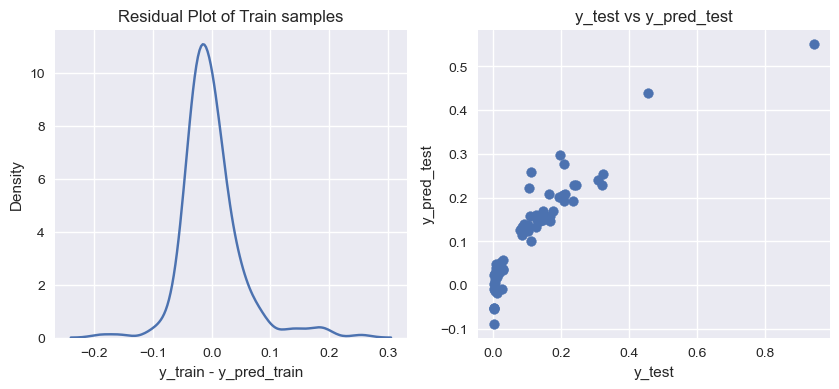

In [43]:
car_pred_model(ls_rs,"lasso.pkl")

#### Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

Train R2-score : 0.95
Test R2-score : 0.88
Train CV scores : [0.94311098 0.79988602 0.9187195  0.80275869 0.93116657]
Train CV mean : 0.88


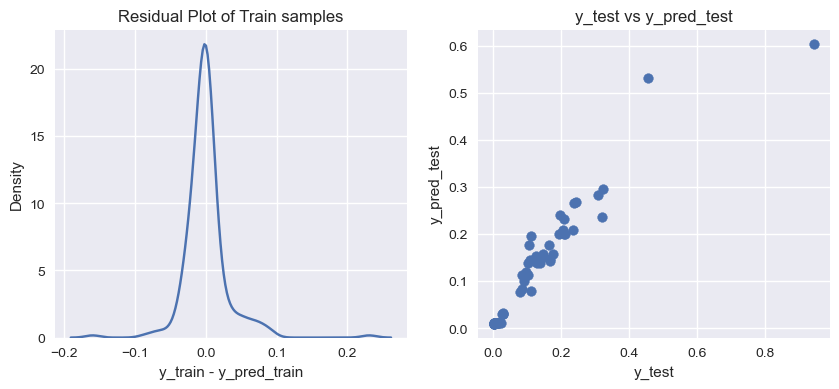

In [45]:
car_pred_model(rf_rs,'random_forest.pkl')

In [46]:
print(rf_rs.best_estimator_)

RandomForestRegressor(max_depth=4, max_features='auto', min_samples_split=6,
                      n_estimators=600)


#### Gradient Boosting

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

Train R2-score : 1.0
Test R2-score : 0.92
Train CV scores : [0.92836352 0.77310147 0.80098153 0.87092288 0.94654197]
Train CV mean : 0.86


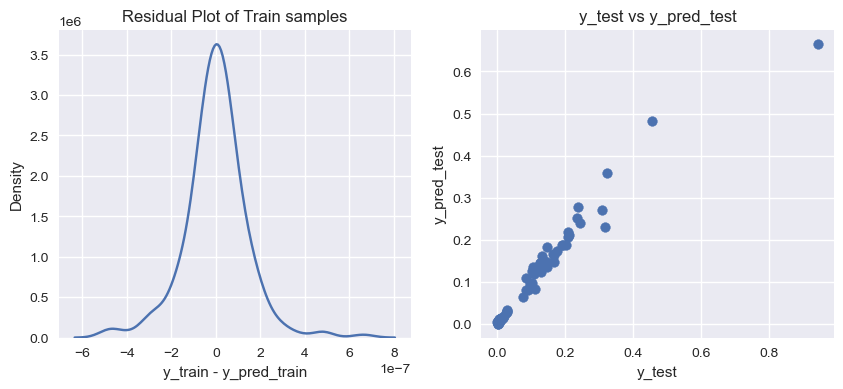

In [48]:
car_pred_model(gb_rs,"gradient_boosting.pkl")

In [49]:
Technique = ["LinearRegression","Ridge","Lasso","RandomForestRegressor","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train)
0,LinearRegression,0.88,0.81,0.82
1,Ridge,0.87,0.79,0.82
2,Lasso,0.87,0.79,0.83
3,RandomForestRegressor,0.95,0.88,0.88
4,GradientBoostingRegressor,1.00,0.92,0.86


## Inference

* Gradient Boosting Regressor is the best model because it gives the highest R² value (0.91) for predicting car prices on new data (test set).

* Random Forest and Gradient Boosting Regressors both perform exceptionally well on the training data.